PREGUNTA SMART

¿De qué manera podemos desarrollar un modelo predictivo basado en datos históricos recolectados cada hora de consumo energético, temperatura y fecha de medicion, para estimar con un margen de error menor al 10% la demanda de energía en Cali para los siguientes 7 dias, permitiendo una mejor planificación y distribución del suministro?

Específica: Se centra en la predicción de la demanda energética en Cali semanal.
Medible: Se establece un margen de error menor al 5%.
Alcanzable: Usa datos históricos y variables relevantes.
Relevante: Facilita la planificación y distribución del suministro permite cumplir con las normas de regulatorias de distribucion de energia.
Temporal: El pronóstico es a 7 dias

In [1]:
#importamos las librerias para analisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#cargamos el dataset
df = pd.read_csv('Data/datasetEmcali.csv')

#mostramos las 5 primeras filas del dataset y las 5 ultimas
print(df.head(5))
print(df.tail(5))






             FECHA  TEMPERATURA  CONSUMO
0  12/01/2017 0:00         27.9    409.0
1  12/01/2017 1:00         29.0    387.0
2  12/01/2017 2:00         29.1    378.0
3  12/01/2017 3:00         28.2    370.0
4  12/01/2017 4:00         26.7    364.0
                       FECHA  TEMPERATURA  CONSUMO
29803   4/25/2021 7:00:00 PM         23.2      NaN
29804   4/25/2021 8:00:00 PM         23.2      NaN
29805   4/25/2021 9:00:00 PM         23.1      NaN
29806  4/25/2021 10:00:00 PM         23.1      NaN
29807  4/25/2021 11:00:00 PM         23.0      NaN


In [2]:
#mostramos la informacion del dataset
print(df.info())
#mostramos la descripcion del dataset


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29808 entries, 0 to 29807
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        29808 non-null  object 
 1   TEMPERATURA  29616 non-null  float64
 2   CONSUMO      29520 non-null  float64
dtypes: float64(2), object(1)
memory usage: 698.8+ KB
None


In [3]:
#revisamos si hay datos duplicados  
print(df.duplicated().sum())
#mostramos los datos duplicados y el cruce de filas duplicadas

print(df.describe())
#mostramos la cantidad de valores nulos
print(df.isnull().sum())

0
        TEMPERATURA       CONSUMO
count  29616.000000  29520.000000
mean      24.127714    455.574139
std        3.163467     95.616579
min       16.100000    227.000000
25%       21.800000    372.000000
50%       23.600000    447.000000
75%       26.300000    541.000000
max       34.000000    676.000000
FECHA            0
TEMPERATURA    192
CONSUMO        288
dtype: int64


In [4]:
#inputamos los valores nulos de temperatura con la temeraura de la fila anterior
df['TEMPERATURA'].fillna(method='ffill', inplace=True)
print(df.isnull().sum())

FECHA            0
TEMPERATURA      0
CONSUMO        288
dtype: int64


C:\Users\rchic\AppData\Local\Temp\ipykernel_19164\2299063562.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TEMPERATURA'].fillna(method='ffill', inplace=True)
C:\Users\rchic\AppData\Local\Temp\ipykernel_19164\2299063562.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['TEMPERATURA'].fillna(method='ffill', inplace=True)


In [5]:
#eliminamos los valores nulos
df.dropna(inplace=True)
#mostramos la cantidad de valores nulos despues de eliminarlos
print(df.isnull().sum())



FECHA          0
TEMPERATURA    0
CONSUMO        0
dtype: int64


In [6]:
print(df.describe())

        TEMPERATURA       CONSUMO
count  29520.000000  29520.000000
mean      24.158882    455.574139
std        3.184461     95.616579
min       16.100000    227.000000
25%       21.800000    372.000000
50%       23.600000    447.000000
75%       26.400000    541.000000
max       34.000000    676.000000


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 29520 entries, 0 to 29519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FECHA        29520 non-null  object 
 1   TEMPERATURA  29520 non-null  float64
 2   CONSUMO      29520 non-null  float64
dtypes: float64(2), object(1)
memory usage: 922.5+ KB
None


In [8]:
#convertimos la columna de fecha a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], format="mixed")
#mostramos la informacion del dataset
print(df.info())
df


<class 'pandas.core.frame.DataFrame'>
Index: 29520 entries, 0 to 29519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        29520 non-null  datetime64[ns]
 1   TEMPERATURA  29520 non-null  float64       
 2   CONSUMO      29520 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 922.5 KB
None


,FECHA,TEMPERATURA,CONSUMO
0,2017-12-01 00:00:00,27.9,409.0
1,2017-12-01 01:00:00,29.0,387.0
2,2017-12-01 02:00:00,29.1,378.0
3,2017-12-01 03:00:00,28.2,370.0
4,2017-12-01 04:00:00,26.7,364.0
...,...,...,...
29515,2021-04-13 19:00:00,23.3,588.0
29516,2021-04-13 20:00:00,23.3,567.0
29517,2021-04-13 21:00:00,23.2,534.0
29518,2021-04-13 22:00:00,23.1,493.0


In [9]:

print(df.info())
#truncamos la columna fecha a solo la fecha
#df['FECHA'] = df['FECHA'].dt.date




<class 'pandas.core.frame.DataFrame'>
Index: 29520 entries, 0 to 29519
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   FECHA        29520 non-null  datetime64[ns]
 1   TEMPERATURA  29520 non-null  float64       
 2   CONSUMO      29520 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 922.5 KB
None


In [ ]:
df_grouped = df
#agrupamos por fecha y calculamos promedio de los valores e incluimos la fecha
# df_grouped = df.groupby('FECHA').mean().reset_index()
#Agrupar por fecha, promediar temperatura y sumar consumo
#df_grouped = df.groupby('FECHA').agg({'TEMPERATURA': 'mean', 'CONSUMO': 'sum'}).reset_index()
#convertimos la columna de fecha a tipo date
df_grouped['FECHA'] = pd.to_datetime(df_grouped['FECHA'])
#agrupamos df por numero de semana iso por año y calculamos promedio de los valores e incluimos la semana y el año

df_grouped['SEMANA'] = df_grouped['FECHA'].dt.isocalendar().week
df_grouped['ANIO'] = df_grouped['FECHA'].dt.isocalendar().year
df_grouped['MES'] = df_grouped['FECHA'].dt.month
df_grouped['DIA_SEMANA'] = df_grouped['FECHA'].dt.dayofweek
df_grouped['HORA'] = df_grouped['FECHA'].dt.hour
# Clasificar los días en 'ordinario', 'sábado' o 'domingo'
df_grouped['CATEGORIA'] = df_grouped['DIA_SEMANA'].apply(lambda x: 'ordinario' if 1 <= x <= 5 else ('Saturday' if x == 6 else 'Sunday'))

#mostramos los valores unicos de CATEGORIA
print(df_grouped['CATEGORIA'].unique())
#mostramos la informacion del dataset
df_grouped


['ordinario' 'Saturday' 'Sunday']


,FECHA,TEMPERATURA,CONSUMO,SEMANA,ANIO,MES,DIA_SEMANA,HORA,CATEGORIA
0,2017-12-01 00:00:00,27.9,409.0,48,2017,12,4,0,ordinario
1,2017-12-01 01:00:00,29.0,387.0,48,2017,12,4,1,ordinario
2,2017-12-01 02:00:00,29.1,378.0,48,2017,12,4,2,ordinario
3,2017-12-01 03:00:00,28.2,370.0,48,2017,12,4,3,ordinario
4,2017-12-01 04:00:00,26.7,364.0,48,2017,12,4,4,ordinario
...,...,...,...,...,...,...,...,...,...
29515,2021-04-13 19:00:00,23.3,588.0,15,2021,4,1,19,ordinario
29516,2021-04-13 20:00:00,23.3,567.0,15,2021,4,1,20,ordinario
29517,2021-04-13 21:00:00,23.2,534.0,15,2021,4,1,21,ordinario
29518,2021-04-13 22:00:00,23.1,493.0,15,2021,4,1,22,ordinario


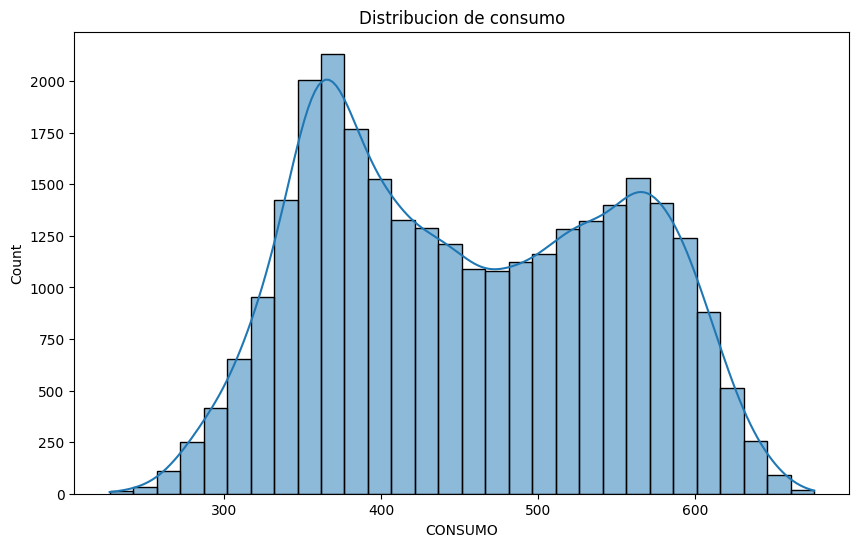

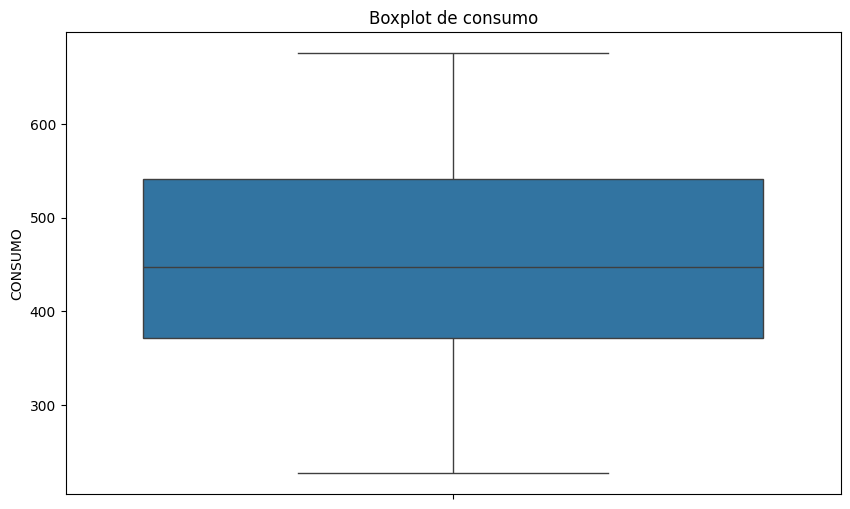

In [40]:
#hacemos una anlisis uni variado de la columna de consumo
plt.figure(figsize=(10, 6)) 
sns.histplot(df_grouped['CONSUMO'], bins=30, kde=True)
plt.title('Distribucion de consumo')
plt.show()
#Ahora con boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(df_grouped['CONSUMO'])
plt.title('Boxplot de consumo')
plt.show()

Ahora analisis BiVariado

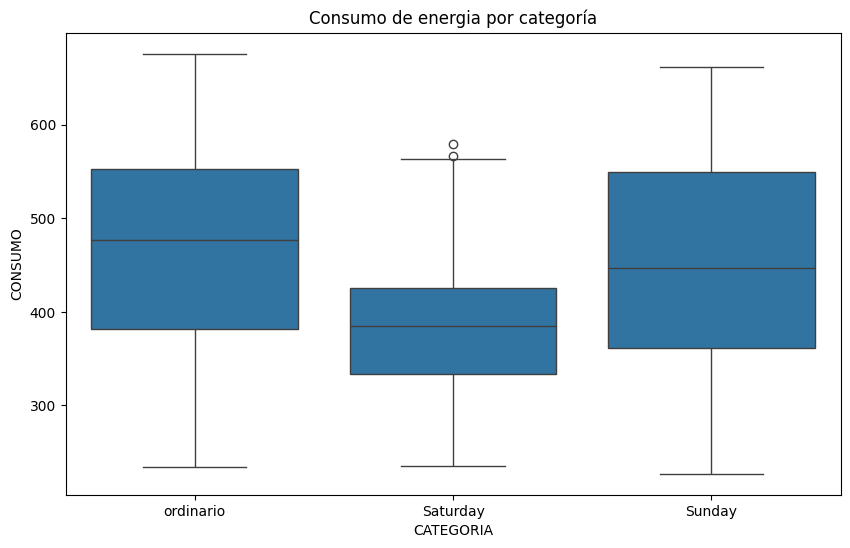

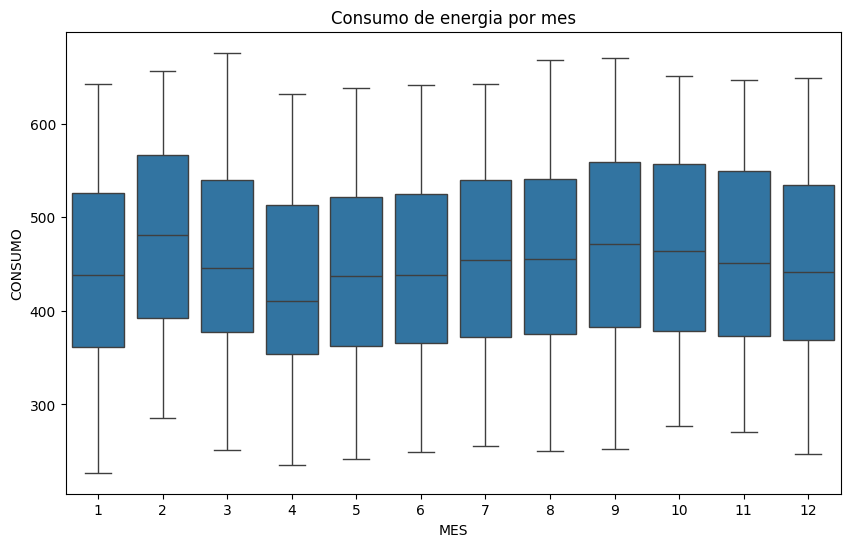

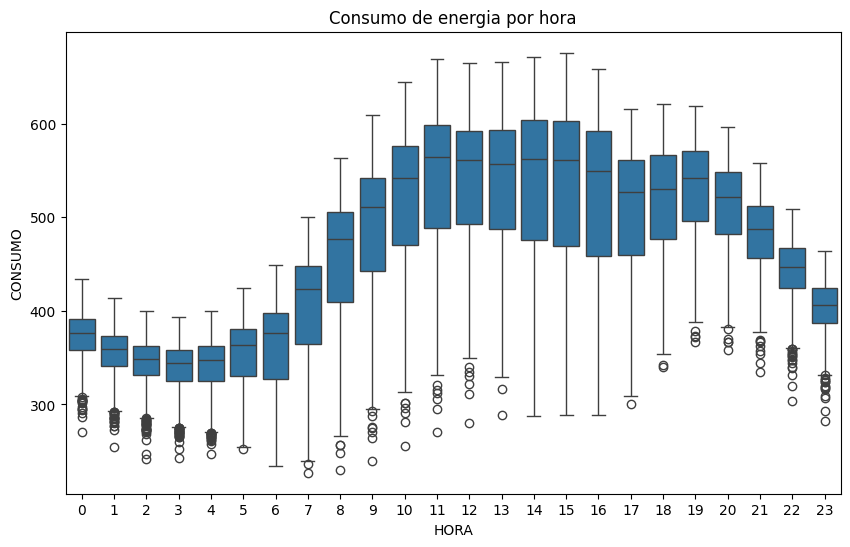

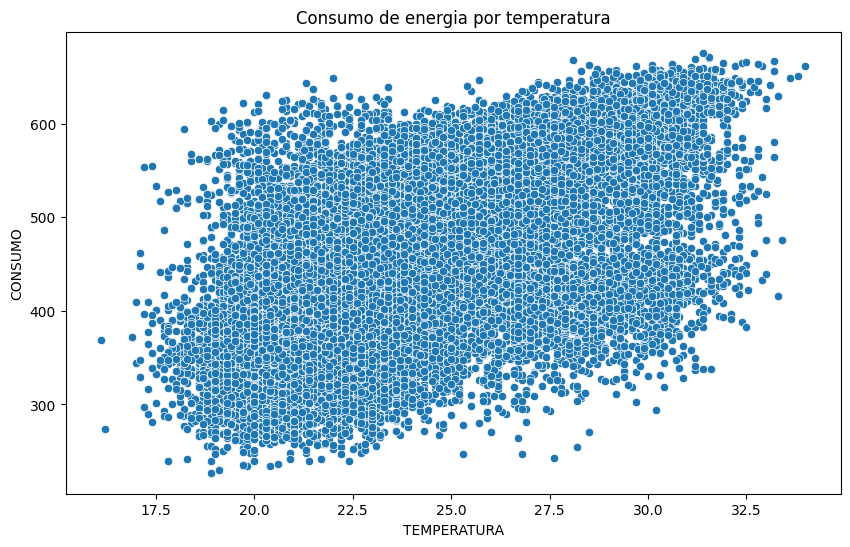

In [ ]:
#Usamos las variables CONSUMO, TEMPERATURA para graficar boxplot
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='CATEGORIA', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por categoría')
plt.show()
#agrgamos consumo por mes
plt.figure(figsize=(10, 6)) 
sns.boxplot(x='MES', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por mes')
plt.show()
#agregamos consumo por hora
plt.figure(figsize=(10, 6))
sns.boxplot(x='HORA', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por hora')
plt.show()
#agregamos consumo por temperatura
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='TEMPERATURA', y='CONSUMO', data=df_grouped)
plt.title('Consumo de energia por temperatura')
plt.show()



             TEMPERATURA   CONSUMO
TEMPERATURA     1.000000  0.588833
CONSUMO         0.588833  1.000000


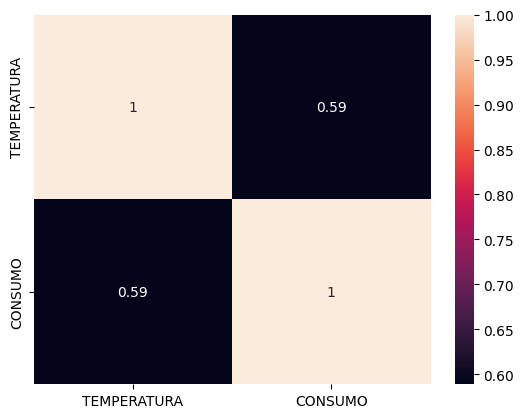

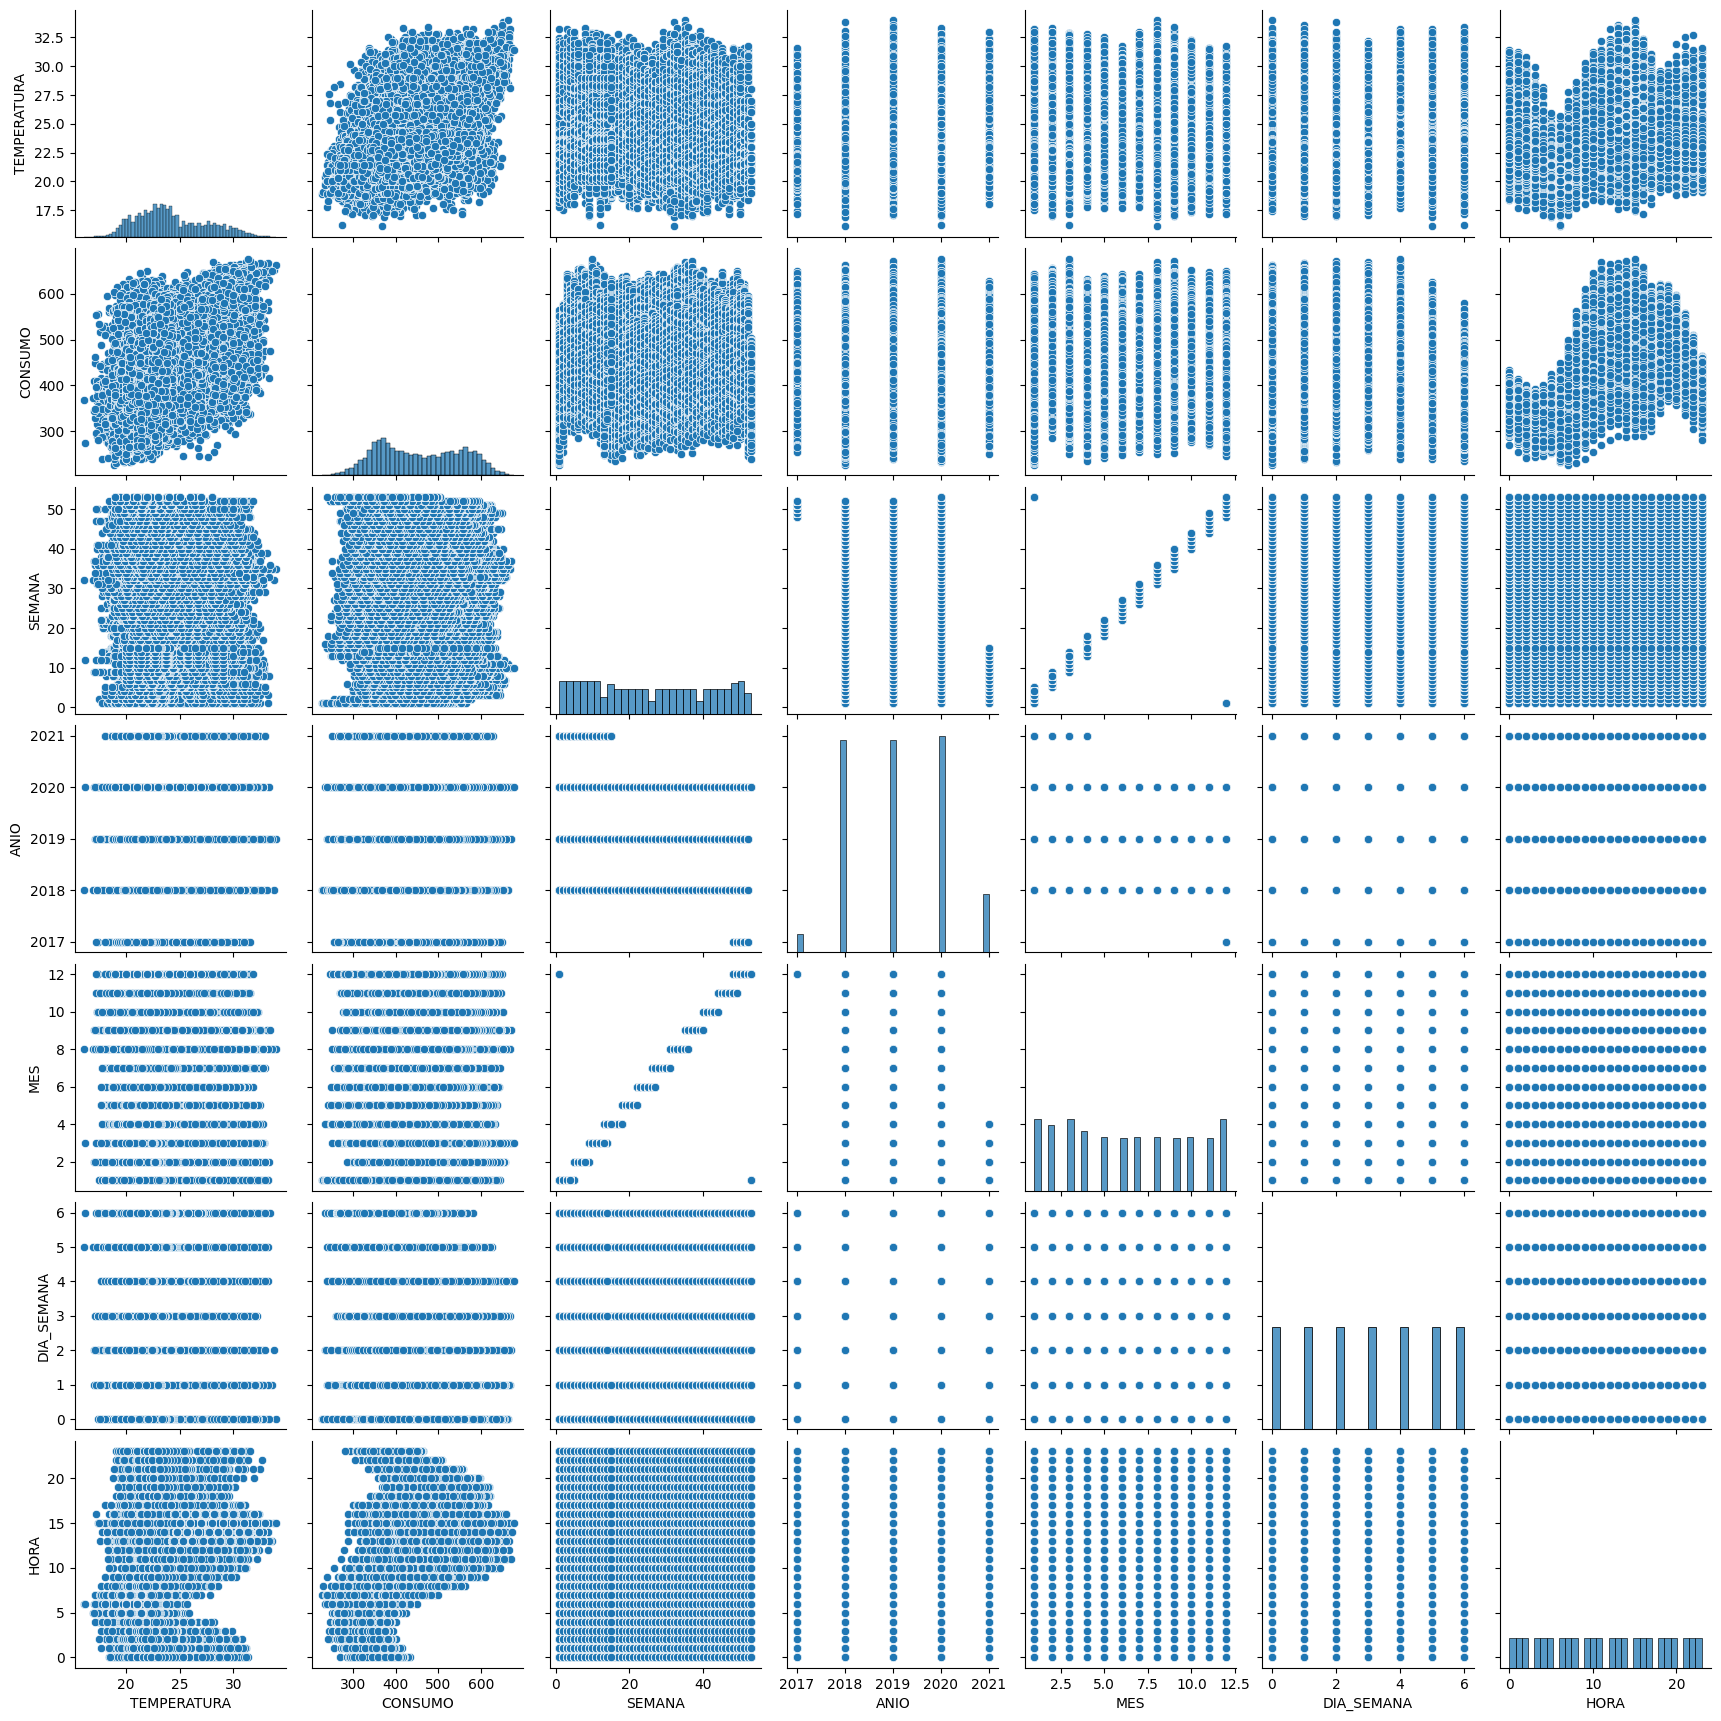

In [35]:
#calculamos la correlacion de las solo las variables temperatura, consumo y semana
correlation = df_grouped[['TEMPERATURA', 'CONSUMO']].corr()
#mostramos la correlacion
print(correlation)
#graficamos la correlacion
sns.heatmap(correlation, annot=True)
plt.show()
#graficamos la correlacion
sns.pairplot(df_grouped)
plt.show()

# NOTA PARA ENTENDER CONSUMO:
# La variable consumo tiene una periodicidad de 7 días, es recomendable hacer el
# análisis por cada ciclo (Lunes, Martes, Miércoles, Jueves, Viernes, Sábado,
# Domingo) Seria recomendable clasificar los datos por tipos de día (Ordinario,
# Sábado, Domingo, Festivo, Dia después de Festivo)
# Seria útil clasificar mes del año